# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.142210e+01     7.131423e+00
 * time: 0.005825042724609375
     1     2.949791e+01     5.687697e+00
 * time: 0.01625990867614746
     2     2.633311e+01     9.136605e+00
 * time: 0.04220890998840332
     3     1.553863e+01     3.404143e+00
 * time: 0.07466793060302734
     4     1.268174e+01     9.552609e-01
 * time: 0.10042500495910645
     5     1.147330e+01     1.158601e+00
 * time: 0.18191790580749512
     6     1.088370e+01     1.550309e+00
 * time: 0.19932794570922852
     7     1.032893e+01     9.346079e-01
 * time: 0.21814894676208496
     8     1.000709e+01     8.399177e-01
 * time: 0.23556089401245117
     9     9.741423e+00     5.588985e-01
 * time: 0.25388383865356445
    10     9.539219e+00     7.789793e-01
 * time: 0.27288198471069336
    11     9.401417e+00     5.330861e-01
 * time: 0.29160594940185547
    12     9.286825e+00     4.248444e-01
 * time: 0.30998897552490234
    13     9.216996e+00     6.614183e-01
 * time

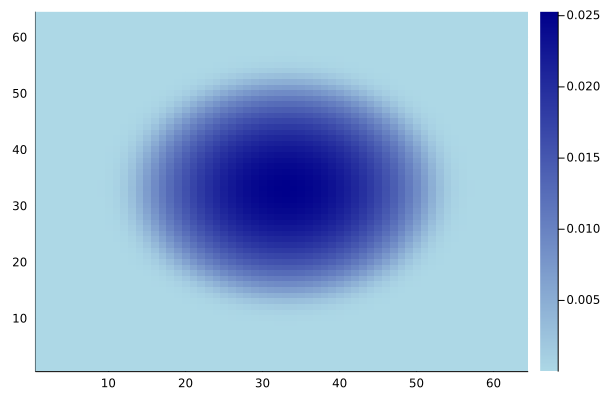

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)